In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'C:/Users/User/Downloads/website_traffic.csv'
data = pd.read_csv(file_path)

# Calculate Correlations
correlations = data.corr(numeric_only=True)  # Handle FutureWarning
conversion_rate_corr = correlations["Conversion Rate"]

# Display the correlation values
print("Correlation with Conversion Rate:\n", conversion_rate_corr)

Correlation with Conversion Rate:
 Page Views          0.126635
Session Duration    0.177798
Bounce Rate        -0.049051
Time on Page        0.229669
Previous Visits     0.109496
Conversion Rate     1.000000
Name: Conversion Rate, dtype: float64


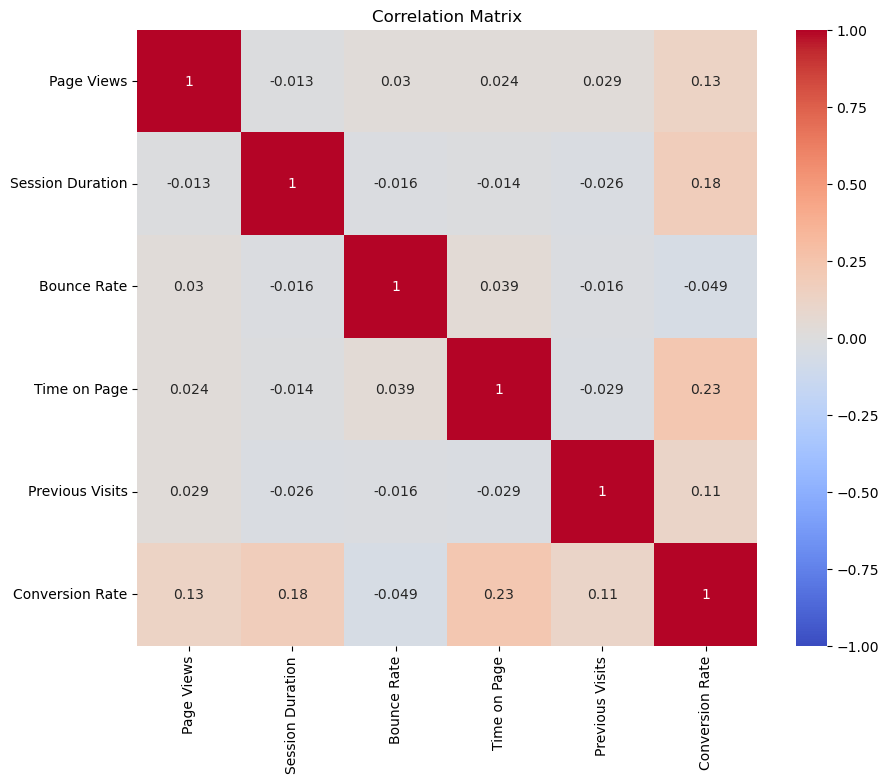

In [50]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

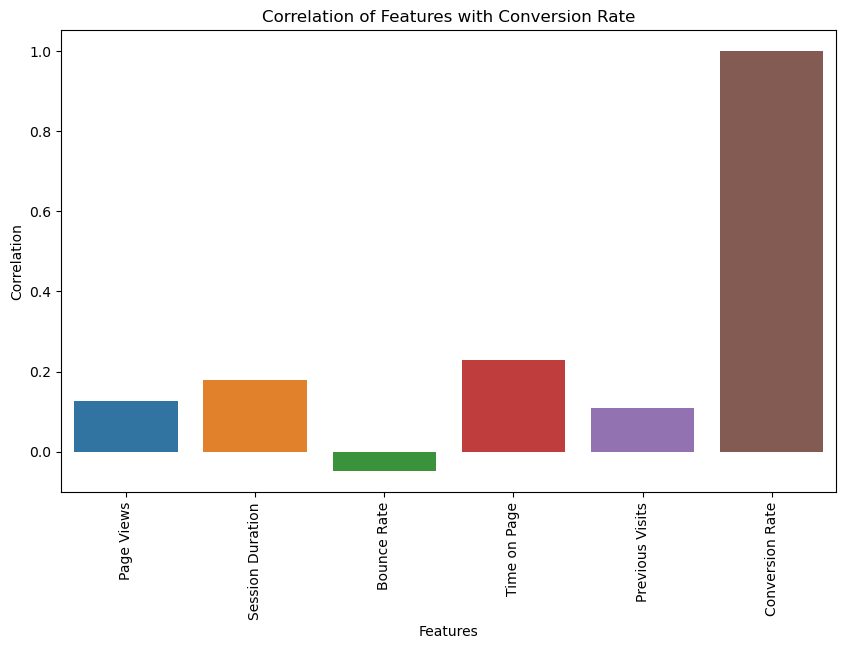

In [52]:
# Visualize correlation with Conversion Rate
plt.figure(figsize=(10, 6))
sns.barplot(x=conversion_rate_corr.index, y=conversion_rate_corr.values)
plt.xticks(rotation=90)
plt.title('Correlation of Features with Conversion Rate')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

In [54]:
# Select features with positive correlation as potential predictors for Conversion Rate
selected_features = conversion_rate_corr[conversion_rate_corr > 0].index.drop("Conversion Rate")
X = data[selected_features]
y = data["Conversion Rate"]

# Data Splitting: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.0317
Mean Absolute Error: 0.031691679454021


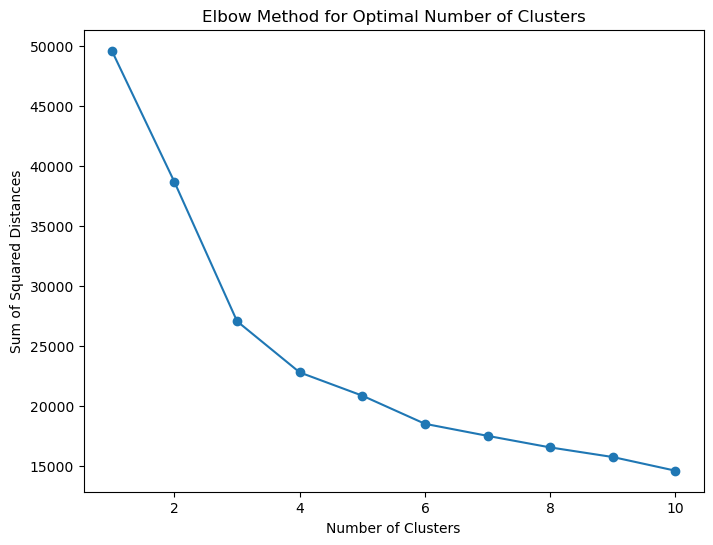

In [56]:
# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()

In [69]:
# Clustering: Using the optimal number of clusters (assume 3 based on the elbow method)
optimal_clusters = 6
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

# Cluster Analysis: Calculate the mean value of each numeric column for each cluster
cluster_means = data.groupby('cluster').mean(numeric_only=True)
print("Cluster Means:\n", cluster_means)

Cluster Means:
          Page Views  Session Duration  Bounce Rate  Time on Page  \
cluster                                                            
0          5.516484          2.767121     0.315327     10.485988   
1          3.543762          1.436965     0.280266      2.158934   
2          5.029851         11.506286     0.265970      3.611066   
3          7.425532          1.785848     0.285041      2.861460   
4          3.997245          1.617303     0.278393      6.018600   
5          4.391720          5.734240     0.289730      3.100508   

         Previous Visits  Conversion Rate  
cluster                                    
0               1.994505         1.000000  
1               2.039106         0.948876  
2               1.850746         1.000000  
3               2.153191         0.986677  
4               1.691460         0.995876  
5               1.990446         0.997909  


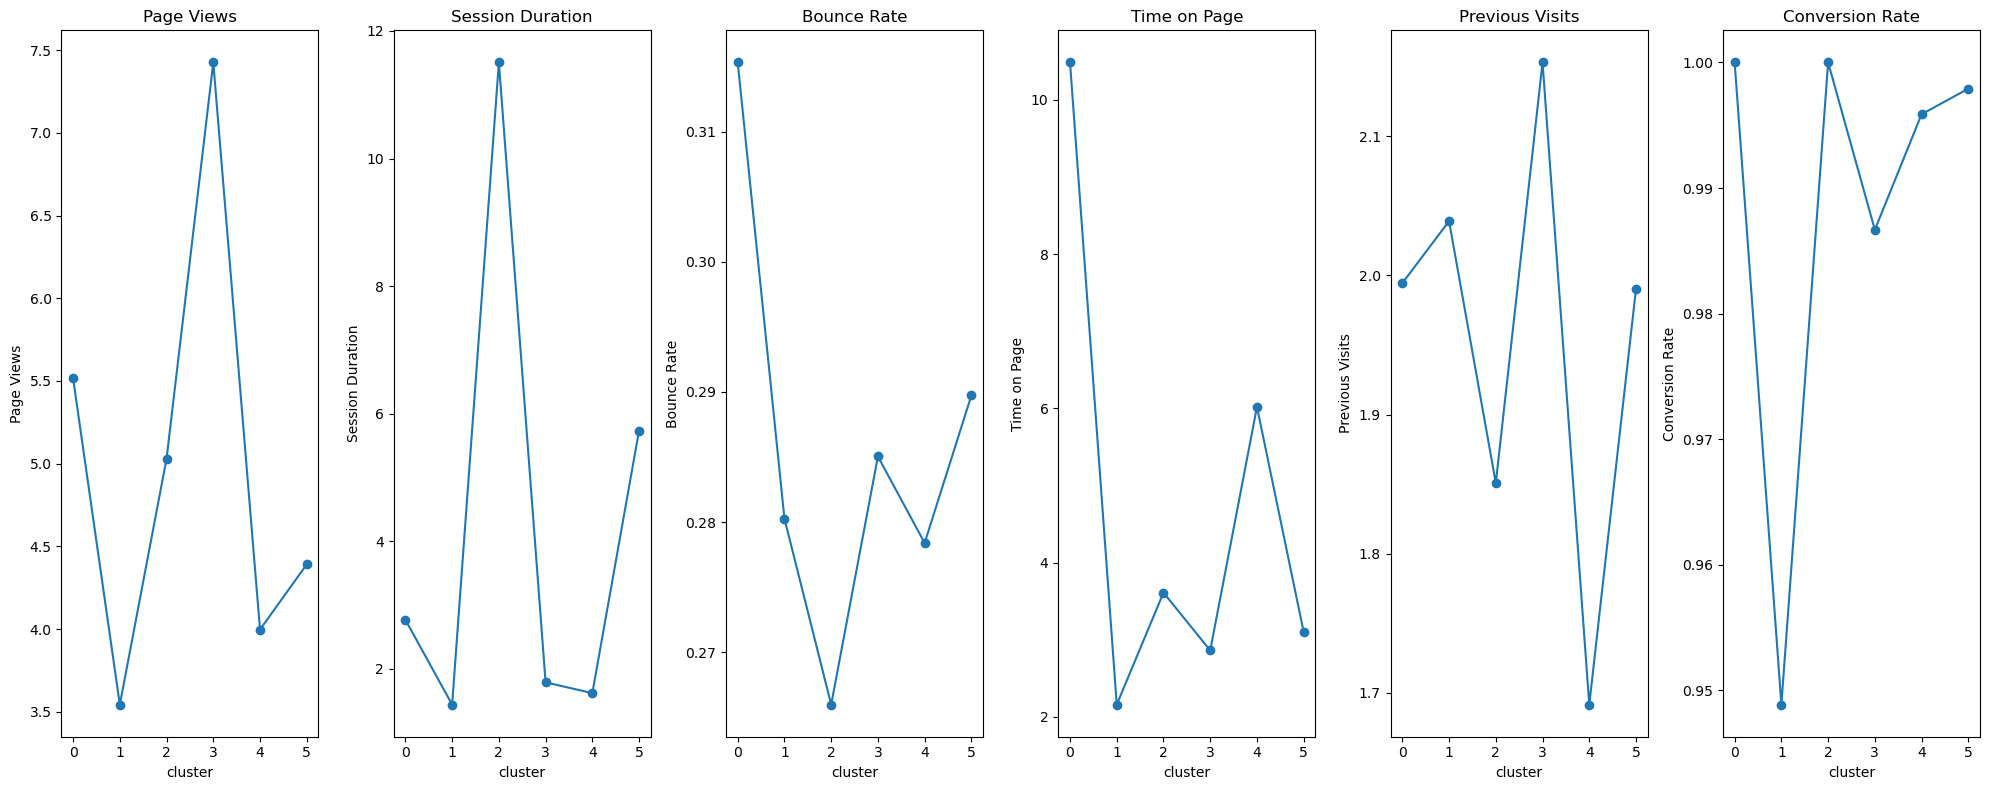

In [71]:
# Cluster Visualisation: Create visualisations to compare the distribution of features within each cluster

# Determine the number of columns (excluding the cluster column)
columns = cluster_means.columns

# Create a figure with subplots
fig, axes = plt.subplots(1, len(columns), figsize=(20, 8), sharey=False)

# Plot each feature's mean across clusters
for i, col in enumerate(columns):
    axes[i].plot(cluster_means.index, cluster_means[col], marker='o')
    axes[i].set_title(col)
    axes[i].set_xlabel('cluster')
    axes[i].set_ylabel(col)

# Adjust layout
plt.tight_layout()
plt.show()

In [73]:
# Analyze the results to identify distinct patterns and insights
insights = []

for column in cluster_means.columns:
    # Find the maximum and minimum means across clusters for each feature
    max_cluster = cluster_means[column].idxmax()
    min_cluster = cluster_means[column].idxmin()
    
    max_value = cluster_means[column].max()
    min_value = cluster_means[column].min()
    
    # Store insights in a list
    insight = (f"Feature '{column}' is highest in cluster {max_cluster} with a mean value of {max_value:.4f}, "
               f"and lowest in cluster {min_cluster} with a mean value of {min_value:.4f}.")
    insights.append(insight)

# Print out the insights
for insight in insights:
    print(insight)


Feature 'Page Views' is highest in cluster 3 with a mean value of 7.4255, and lowest in cluster 1 with a mean value of 3.5438.
Feature 'Session Duration' is highest in cluster 2 with a mean value of 11.5063, and lowest in cluster 1 with a mean value of 1.4370.
Feature 'Bounce Rate' is highest in cluster 0 with a mean value of 0.3153, and lowest in cluster 2 with a mean value of 0.2660.
Feature 'Time on Page' is highest in cluster 0 with a mean value of 10.4860, and lowest in cluster 1 with a mean value of 2.1589.
Feature 'Previous Visits' is highest in cluster 3 with a mean value of 2.1532, and lowest in cluster 4 with a mean value of 1.6915.
Feature 'Conversion Rate' is highest in cluster 0 with a mean value of 1.0000, and lowest in cluster 1 with a mean value of 0.9489.
